### Problema 1
#### Opción A

In [1]:
from Modules.Graphics import plot_bars, plot_ages_histogram, plot_word_cloud, plot_monthly_results, plot_yearly_results
from Modules.functions import join_path, obtain_name_place_from_filename, ls, obtain_best_features, concat_dataframes
from pandas import DataFrame, read_csv, to_datetime
from Modules.tripadvisor import tripadvisor_model
from Modules.vocabulary import vocabulary_class
from Modules.dictionary import dictionary_model
from Modules.datasets import parameters_model
from Modules.BoW import BoW_class
import matplotlib.pyplot as plt
from Modules.LSA import LSA
vocabulary_model = vocabulary_class()
dictionary = dictionary_model()
dataset = parameters_model()
tripadvisor = tripadvisor_model(dataset)
bow = BoW_class(vocabulary_model)
files = ls(dataset.parameters["path data"])

In [2]:
results = {}
result_basis = {"Mean": 0.0,
                "std": 0.0}
for file in files:
    nameplace = obtain_name_place_from_filename(file)
    tripadvisor.read_data(file)
    mean = tripadvisor.data["Escala"].mean()
    std = tripadvisor.data["Escala"].std()
    results[nameplace] = result_basis.copy()
    results[nameplace]["Mean"] = mean
    results[nameplace]["std"] = std
results = DataFrame(results)
results.index.name = "Results"

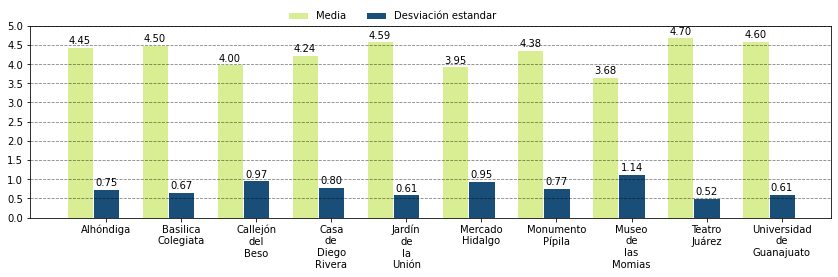

In [3]:
parameters = {"file results": "mean_std_scores.csv",
              "file graphics": "mean_std_scores.png",
              "width": 0.35,
              "y lim": 5,
              "y delta": 0.5,
              "keys": ["Mean", "std"],
              "labels": ["Media", "Desviación estandar"],
              "colors":   ["#d9ed92", "#184e77"],
              "format": "%.2f"}
data = results.transpose()
plot_bars(data, dataset, parameters, show=True)

### Problema 1
#### Opción B

In [4]:
results = {}
result_basis = {"Mean": 0.0,
                "std": 0.0}
for file in files:
    nameplace = obtain_name_place_from_filename(file)
    tripadvisor.read_data(file)
    tripadvisor.obtain_word_length_per_opinion()
    mean = tripadvisor.data["Word length"].mean()
    std = tripadvisor.data["Word length"].std()
    results[nameplace] = result_basis.copy()
    results[nameplace]["Mean"] = mean
    results[nameplace]["std"] = std
results = DataFrame(results)
results.index.name = "Results"

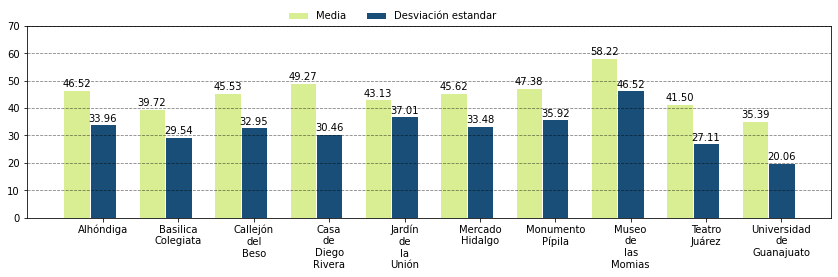

In [5]:
parameters = {"file results": "mean_std_words_length.csv",
              "file graphics": "mean_std_words_length.png",
              "width": 0.35,
              "y lim": 70,
              "y delta": 10,
              "keys": ["Mean", "std"],
              "labels": ["Media", "Desviación estandar"],
              "colors":   ["#d9ed92", "#184e77"],
              "format": "%.2f"}
data = results.transpose()
plot_bars(data, dataset, parameters, show=True)

### Problema 1
#### Opción C

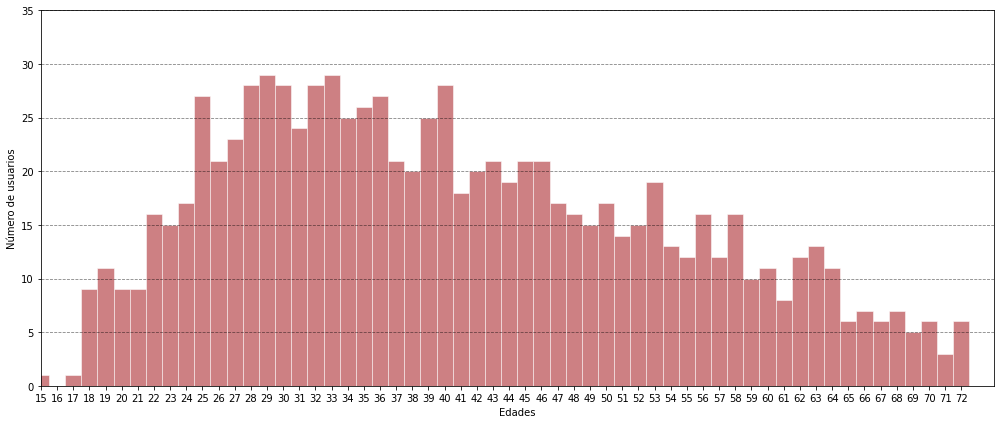

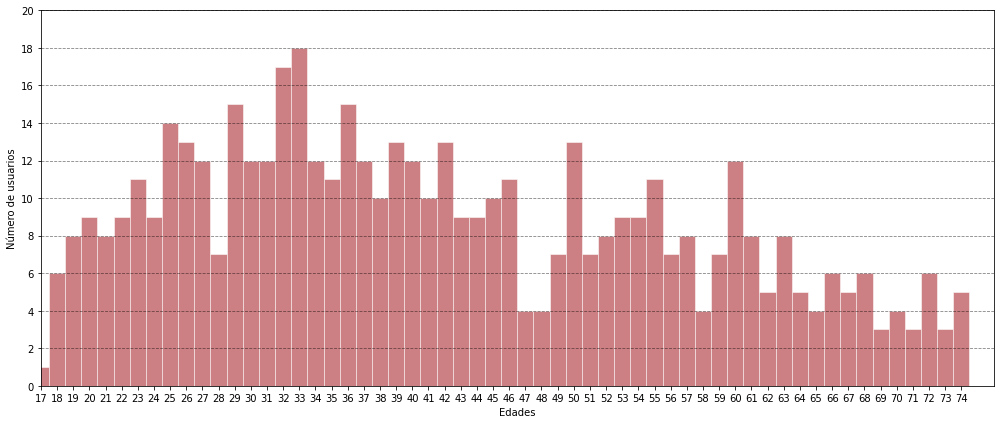

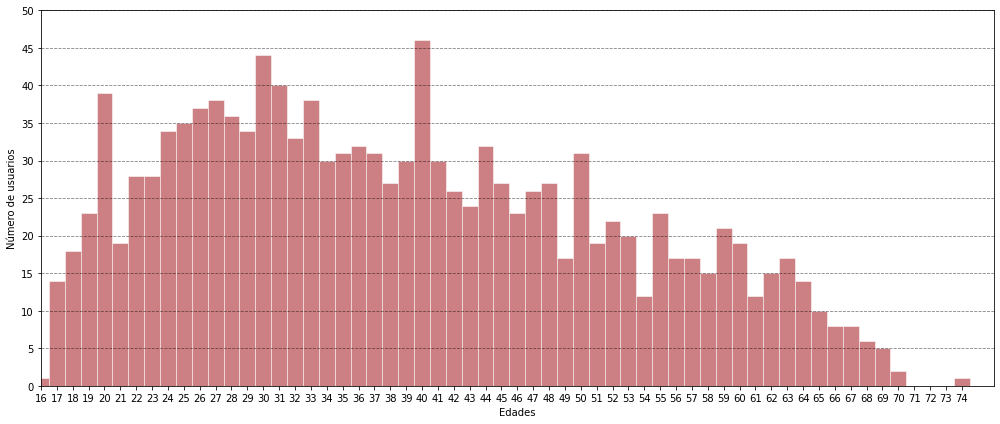

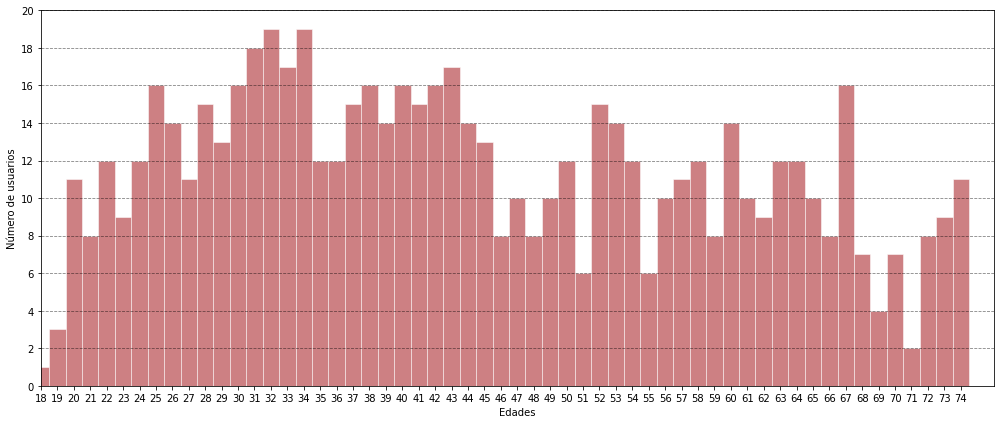

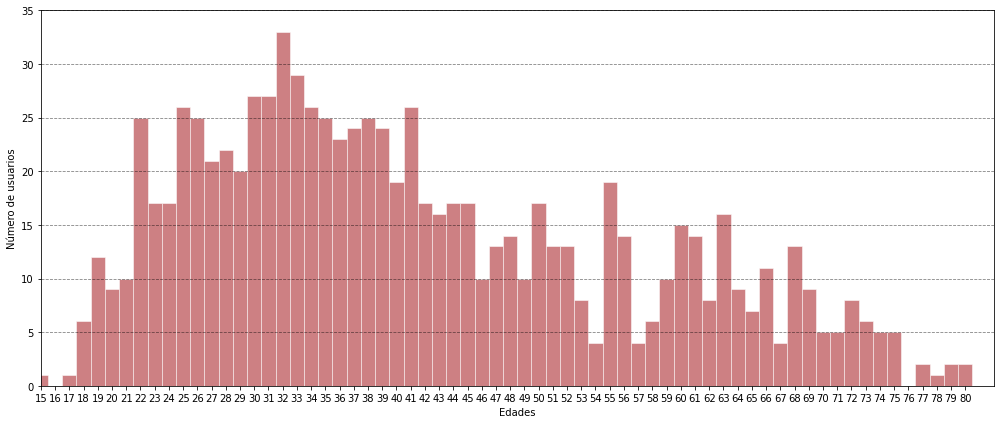

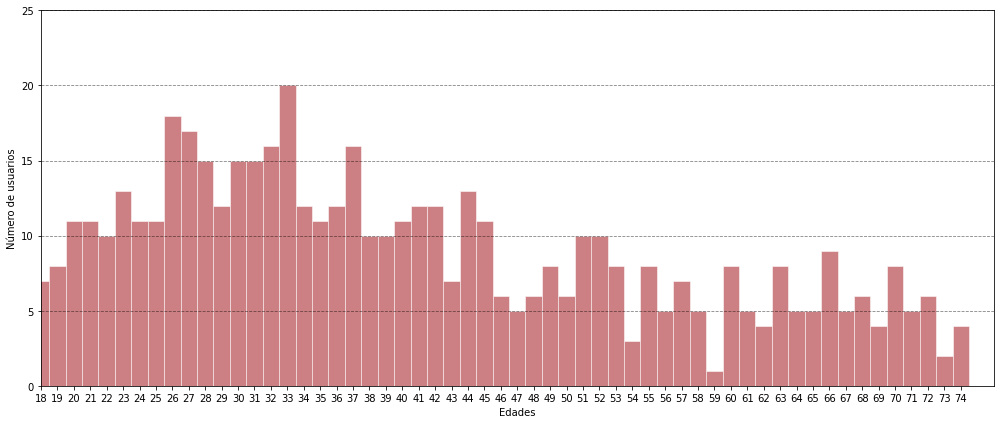

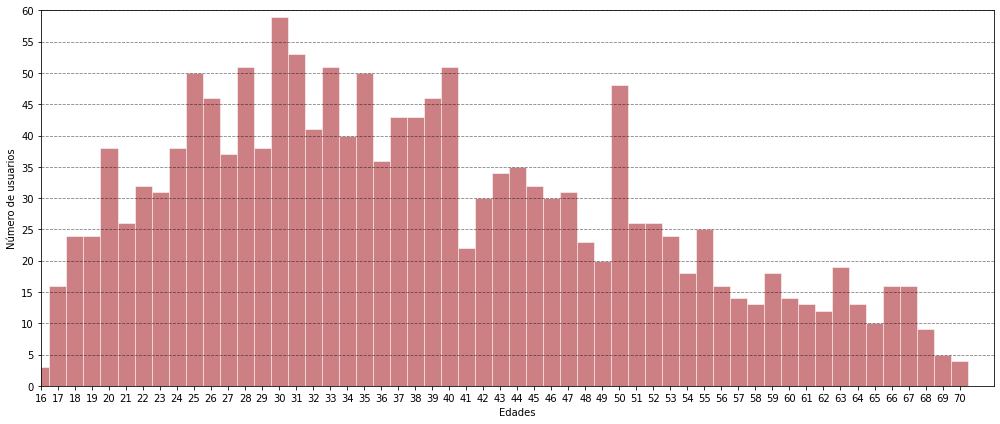

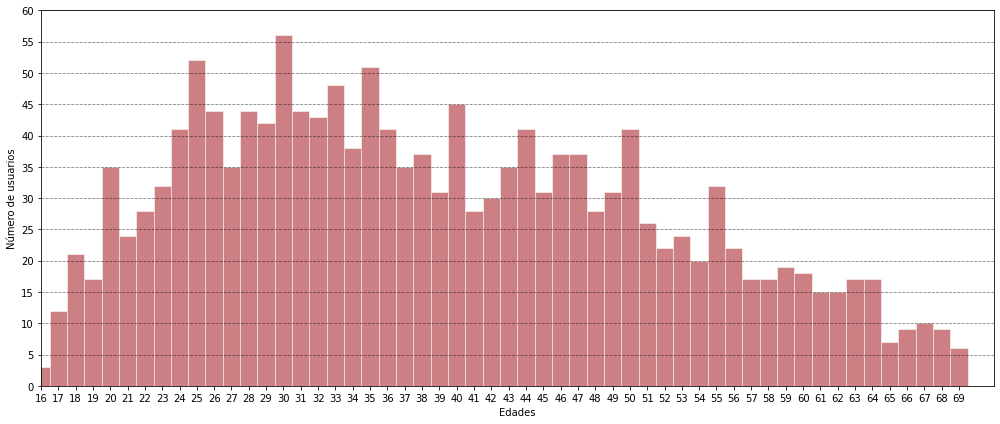

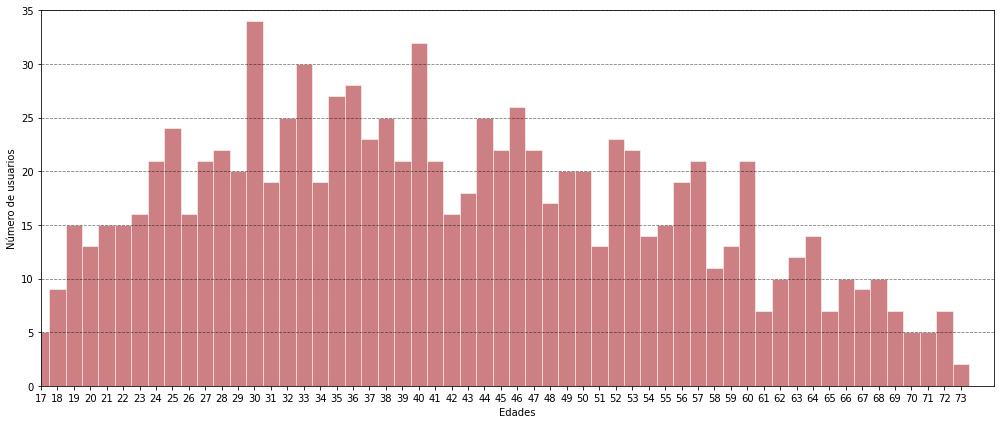

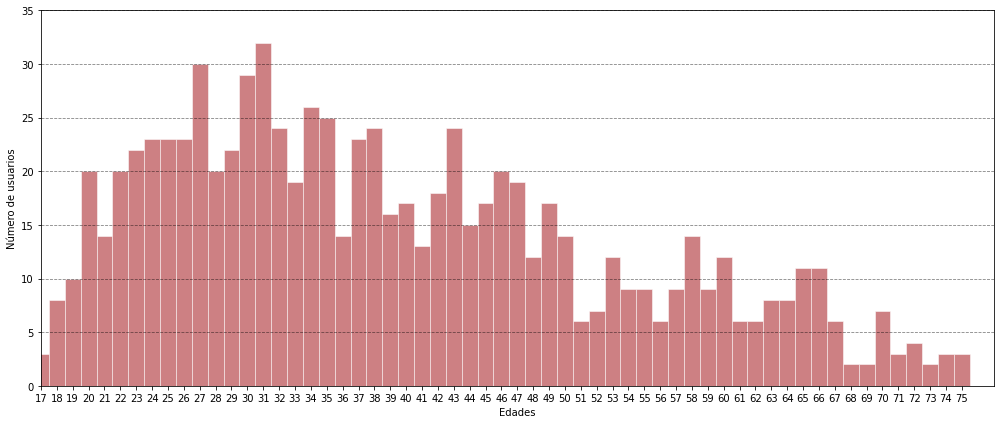

In [6]:
parameters = {"filename": ""}
for file in files:
    nameplace = obtain_name_place_from_filename(file)
    tripadvisor.read_data(file)
    filename = file.replace(".csv", ".png")
    parameters["filename"] = filename
    plot_ages_histogram(tripadvisor.data["Edad"],
                        dataset,
                        parameters,
                        show=True)

### Problema 1
#### Opción D

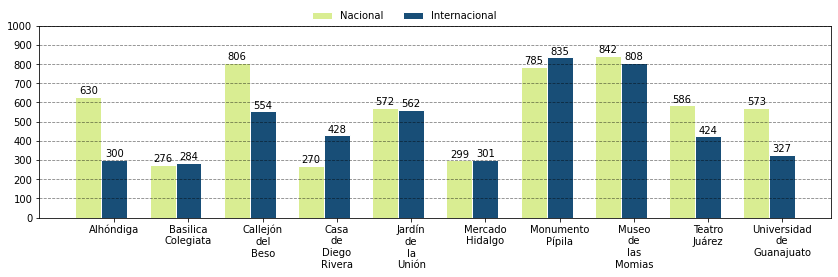

In [7]:
parameters = {"file results": "distribution_nationality.csv",
              "file graphics": "distribution_nationality.png",
              "width": 0.35,
              "y lim": 1000,
              "y delta": 100,
              "keys": ["Nacional", "Internacional"],
              "labels": ["Nacional", "Internacional"],
              "colors":   ["#d9ed92", "#184e77"],
              "format": "%.0f"}
results = {}
result_basis = {"Nacional": 0,
                "Internacional": 0}
for file in files:
    nameplace = obtain_name_place_from_filename(file)
    tripadvisor.read_data(file)
    result = tripadvisor.data["Nacional ó Internacional"].value_counts()
    results[nameplace] = result_basis.copy()
    for key in result.keys():
        results[nameplace][key] = result[key]
results = DataFrame(results)
results.index.name = "Nationality"
data = results.transpose()
plot_bars(data, dataset, parameters, show=True)

### Problema 1
#### Opción E

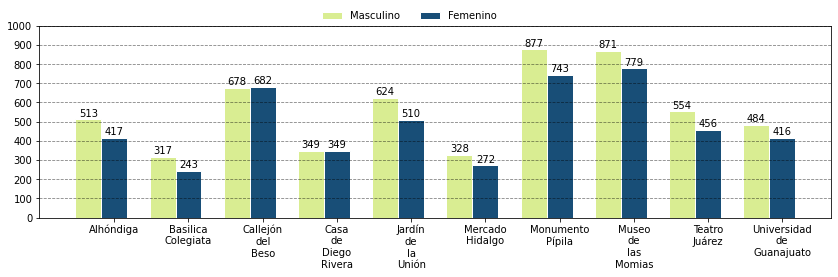

In [8]:
parameters = {"file results": "distribution_genders.csv",
              "file graphics": "distribution_genders.png",
              "width": 0.35,
              "y lim": 1000,
              "y delta": 100,
              "keys": ["Masculino", "Femenino"],
              "labels": ["Masculino", "Femenino"],
              "colors":   ["#d9ed92", "#184e77"],
              "format": "%.0f"}
results = {}
result_basis = {"Masculino": 0,
                "Femenino": 0}
for file in files:
    nameplace = obtain_name_place_from_filename(file)
    tripadvisor.read_data(file)
    result = tripadvisor.data["Género"].value_counts()
    results[nameplace] = result_basis.copy()
    for key in result.keys():
        results[nameplace][key] = result[key]
results = DataFrame(results)
results.index.name = "Gender"
dataset = parameters_model()
data = results.transpose()
plot_bars(data, dataset, parameters, show=True)

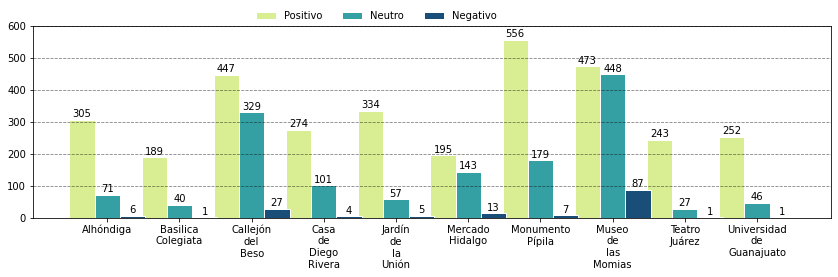

In [9]:
parameters = {"file results": "distribution_scores.csv",
              "file graphics": "distribution_scores.png",
              "width": 0.35,
              "y lim": 600,
              "y delta": 100,
              "keys": ["Positivo", "Neutro", "Negativo"],
              "labels": ["Positivo", "Neutro", "Negativo"],
              "colors":   ["#d9ed92", "#34a0a4", "#184e77"],
              "format": "%.0f"}
results = {}
result_basis = {"Positivo": 0,
                "Neutro": 0,
                "Negativo": 0}
for file in files:
    nameplace = obtain_name_place_from_filename(file)
    tripadvisor.read_data(file)
    result = tripadvisor.data["Escala"].value_counts()
    results[nameplace] = result_basis.copy()
    for key in result.keys():
        if key in [4, 5]:
            key_name = "Positivo"
        if key in [3]:
            key_name = "Neutro"
        if key in [1, 2]:
            key_name = "Negativo"
        results[nameplace][key_name] = result[key]
results = DataFrame(results)
results.index.name = "Calificación"
data = results.transpose()
plot_bars(data, dataset, parameters, show=True)

### Problema 2

Alhóndiga


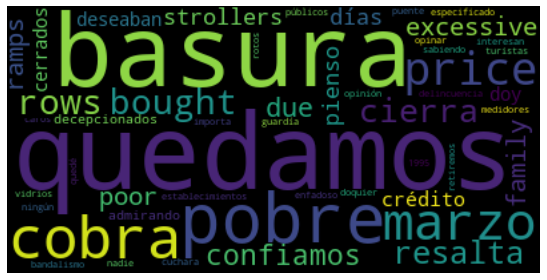

Basilica Colegiata


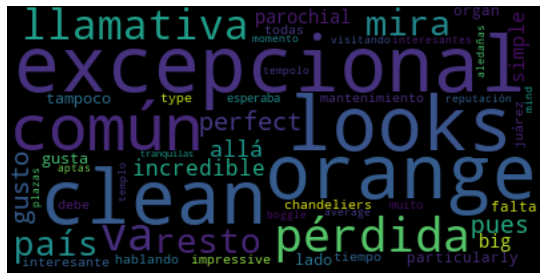

Callejón del Beso


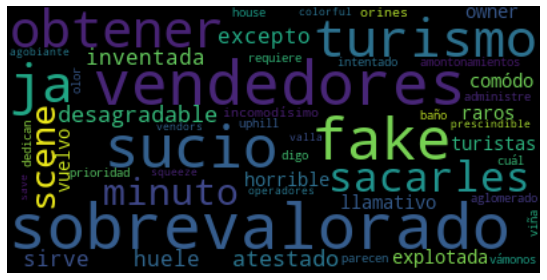

Casa de Diego Rivera


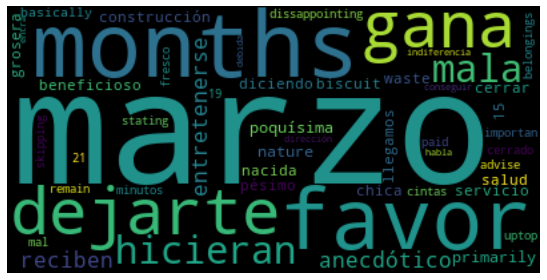

Jardín de la Unión


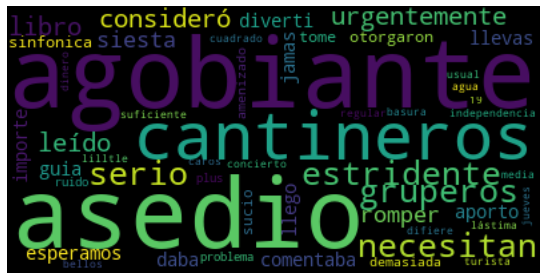

Mercado Hidalgo


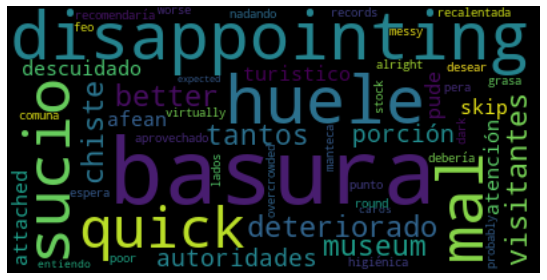

Monumento Pípila


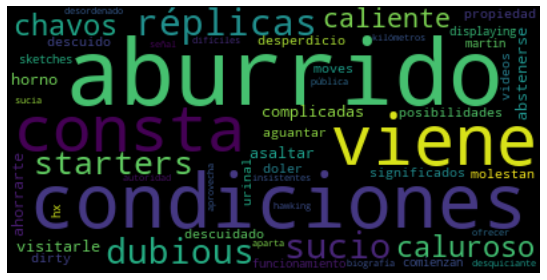

Museo de las Momias


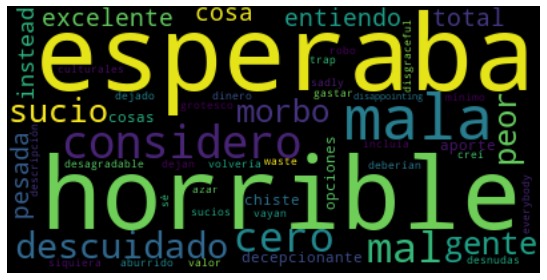

Teatro Juárez


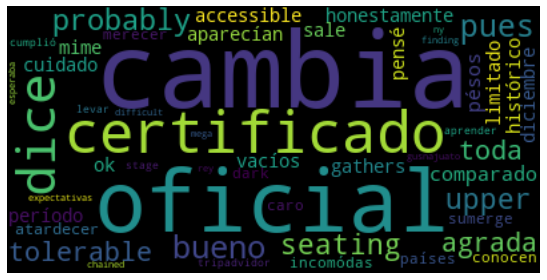

Universidad de Guanajuato


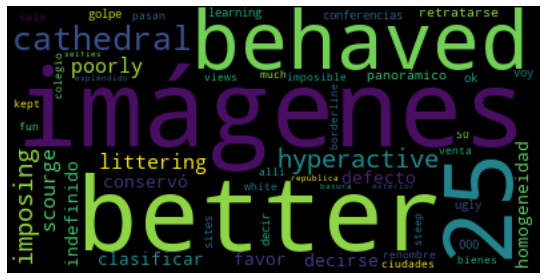

In [10]:
parameters = {"wordcloud name": ""}
results = {}
result_basis = {"Words": [],
                "Scores": []}
for file in files:
    nameplace = obtain_name_place_from_filename(file)
    print(nameplace)
    tripadvisor.read_data(file)
    vocabulary = vocabulary_model.obtain(tripadvisor)
    word_index = dictionary.build_word_index(vocabulary)
    index_word = dictionary.build_index_word(word_index)
    binary, words = bow.build_TFIDF(tripadvisor,
                                    word_index,
                                    return_words=True)
    best_features, scores = obtain_best_features(binary,
                                                 tripadvisor.data["new scale"],
                                                 50)
    results = {}
    for index in best_features:
        results[words[index]] = scores[index]
    results = dictionary.sort_dict(results)
    results = DataFrame(results,
                        columns=["Words", "Scores"])
    results.index = results["Words"]
    results = results.drop(columns="Words")
    plot_word_cloud(results["Scores"].to_dict(),
                    dataset,
                    parameters,
                    show=True)

### Problema 3
#### Opción A

In [11]:
genders = ["Masculino", "Femenino"]
for file in files:
    nameplace = obtain_name_place_from_filename(file)
    tripadvisor.read_data(file)
    for gender in genders:
        print("-"*40)
        print("{:>20}\tGénero: {}".format(nameplace, gender))
        tripadvisor.select_data_per_gender(gender)
        vocabulary = vocabulary_model.obtain(tripadvisor,
                                             data_select=True)
        word_index = dictionary.build_word_index(vocabulary)
        tfidf, words = bow.build_TFIDF(tripadvisor,
                                       word_index,
                                       data_select=True,
                                       return_words=True)
        lsa = LSA(tfidf, words, 3)
        lsa.obtain_words()
        lsa.obtain_top_words(10)
        print(lsa.top_words)

----------------------------------------
           Alhóndiga	Género: Masculino
     Topic 1        Topic 2    Topic 3
0       poor      enfatizar  converted
1     family     territorio   entrance
2   friendly          suena  artifacts
3        due       contexto   memorial
4  excessive         abunda      debes
5  strollers          guión    insight
6      ramps     repetitivo     rained
7      check        insertó      mined
8    helpful  guanajuatense    crawled
9    thought         inicar       slab
----------------------------------------
           Alhóndiga	Género: Femenino
    Topic 1      Topic 2          Topic 3
0   venders        armas      espectáculo
1  animated   finalmente           placer
2     color       típico         movement
3     strre    siqueiros           wooden
4  shooping  pertenecias  revolucionarios
5    needed        aquel        visitante
6  selected     escritos         contexto
7     seats     sentirte    internacional
8     seven       parado      movi

         Topic 1        Topic 2       Topic 3
0  fantastically  boqiuiabierto  shortcomings
1            6th         dejara        social
2            5th        reunion         roles
3         berlin          patio    privileges
4   philharmonic     imperativo    staircases
5            saw          pagué      possible
6         causal            mxp      portrays
7         sunday          vibra   arrangement
8          stain        asistes        placer
9       woodland      organizan       interna
----------------------------------------
       Teatro Juárez	Género: Femenino
       Topic 1       Topic 2       Topic 3
0         ages       mesitas  disappointed
1       unlike    neoclásico       ventaja
2       unique         entré        verlas
3      roasted      llenarte      comienzo
4   delightful         rodea       llevado
5         corn        grande          cabo
6           73       paredes          gold
7   encouraged  emblemáticos       milling
8     terrific       juarear

### Problema 3
#### Opción C y D

In [12]:
nationalities = ["Nacional", "Internacional"]
for file in files:
    nameplace = obtain_name_place_from_filename(file)
    tripadvisor.read_data(file)
    for nationality in nationalities:
        print("-"*40)
        print("{:>20}\tCategoria: {}".format(nameplace, nationality))
        tripadvisor.select_data_per_nationality(nationality)
        vocabulary = vocabulary_model.obtain(tripadvisor,
                                             data_select=True)
        word_index = dictionary.build_word_index(vocabulary)
        tfidf, words = bow.build_TFIDF(tripadvisor,
                                       word_index,
                                       data_select=True,
                                       return_words=True)
        lsa = LSA(tfidf, words, 3)
        lsa.obtain_words()
        lsa.obtain_top_words(10)
        print(lsa.top_words)

----------------------------------------
           Alhóndiga	Categoria: Nacional
     Topic 1   Topic 2        Topic 3
0   animated   venders         podría
1    venders  shooping      españolas
2      strre     color         market
3   shooping    street             tv
4     street     strre  interactuando
5      color  animated    emocionados
6    visited    events          reúne
7  displayed       old        llevará
8      loved   menores         arriba
9   although  superior      presentan
----------------------------------------
           Alhóndiga	Categoria: Internacional
       Topic 1      Topic 2     Topic 3
0   impecables       buncos      alguno
1    narrativa      origins     aspecto
2      pierdas        craft     creería
3      externa         easy    envidiar
4     perfecta     murdered  aprenderás
5        seria        broke    palacios
6      interna     happened       vivió
7       lindos          led  espléndido
8    secuencia       forces    interesa
9  disposicio

      Topic 1         Topic 2       Topic 3
0        guie             def     reluctant
1   comparado       conserved       upright
2   encuentre          metals         pricy
3       audio         grounds        desear
4  viejísimas            rich   hemispheres
5    platican             six      northern
6     caminas          marked         charm
7     repiten       indicates          mall
8       dónde     shamelessly  significance
9      oscuro  sophistication          sole
----------------------------------------
       Teatro Juárez	Categoria: Nacional
      Topic 1      Topic 2       Topic 3
0       heard        whole       interés
1       never         went      cercanía
2        talk  experienced        mancha
3      turist      blocked         puedo
4     aguilar      seating     providing
5   ascención        stage          give
6        need     probably       brought
7        hope       levels  construction
8  definetely        upper        guides
9      guerra         ab

### Problema 3
#### Opción E y F

In [13]:
ages = ["Joven", "Mayor"]
for file in files:
    nameplace = obtain_name_place_from_filename(file)
    tripadvisor.read_data(file)
    for age in ages:
        print("-"*40)
        print("{:>20}\tCategoria: {}".format(nameplace, age))
        tripadvisor.select_data_per_age_range(age)
        vocabulary = vocabulary_model.obtain(tripadvisor,
                                             data_select=True)
        word_index = dictionary.build_word_index(vocabulary)
        tfidf, words = bow.build_TFIDF(tripadvisor,
                                       word_index,
                                       data_select=True,
                                       return_words=True)
        lsa = LSA(tfidf, words, 3)
        lsa.obtain_words()
        lsa.obtain_top_words(10)
        print(lsa.top_words)

----------------------------------------
           Alhóndiga	Categoria: Joven
     Topic 1       Topic 2     Topic 3
0  strollers       miseria       quick
1        due       edifico        trip
2       poor     pillerias   leisurely
3  excessive     indigenas      recent
4     family     haciendas        post
5      ramps    produccion   inclusive
6      strre   protegerlos  historicos
7    venders          raya       bring
8      color          base    thinking
9   shooping  resguradaban   sensitive
----------------------------------------
           Alhóndiga	Categoria: Mayor
        Topic 1       Topic 2      Topic 3
0         front       comente  sorprenderá
1        needed       guardan        fines
2         seats           veo     entradas
3         seven         quizà         caja
4      selected  originalidad   impresionó
5         dirty     grandioso    visitarla
6     figurines         casas    abolición
7      favorite      opresión    struggles
8       alfredo       guia

       Topic 1     Topic 2       Topic 3
0           12      tiende        tamaño
1           73   edicifcio    understand
2     terrific        chon      finished
3         corn  inpactante         event
4  distraction    relajada         pasos
5   encouraged    cuidando  entertaining
6       crowds       tarda   jawdropping
7   delightful    apurando     magically
8       unlike          11          size
9  participate     vueltos        season
----------------------------------------
       Teatro Juárez	Categoria: Mayor
     Topic 1       Topic 2      Topic 3
0       cast      toditito         step
1      metal   ampliamente    standards
2    recited  recomendamos     american
3      steel         nadar        parts
4    created      encantar  appropriate
5      stain      visitalo       wander
6  designers     totalidad       camera
7      mixed   interesanto       option
8    italian       viernes    victorian
9   woodland   filarmónica     purchase
------------------------------

### Problema 4

Alhóndiga


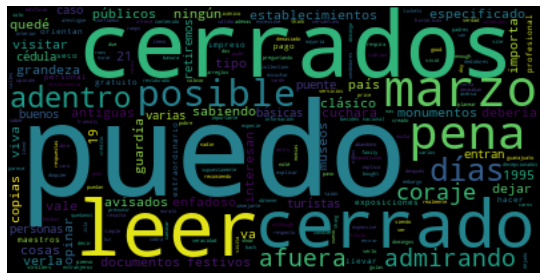

Basilica Colegiata


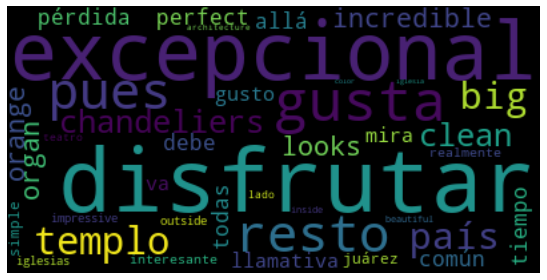

Callejón del Beso


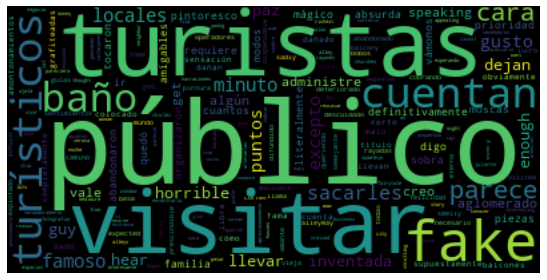

Casa de Diego Rivera


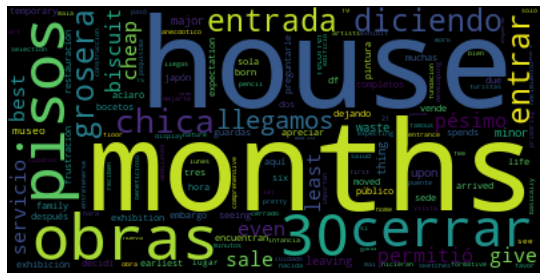

Jardín de la Unión


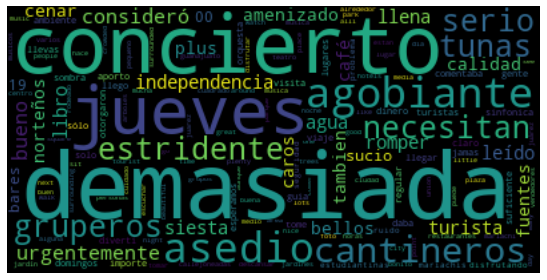

Mercado Hidalgo


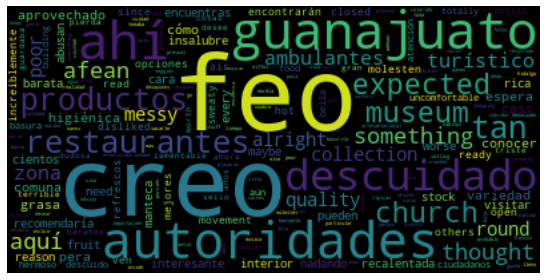

Monumento Pípila


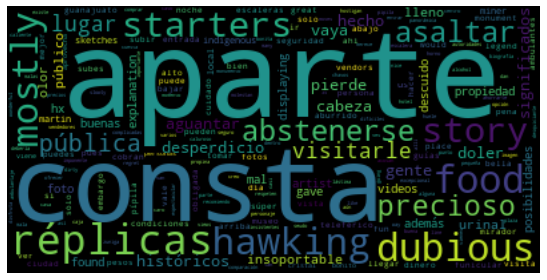

Museo de las Momias


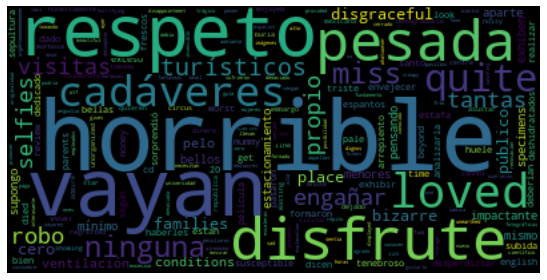

Teatro Juárez


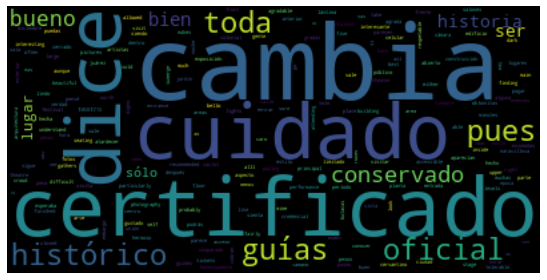

Universidad de Guanajuato


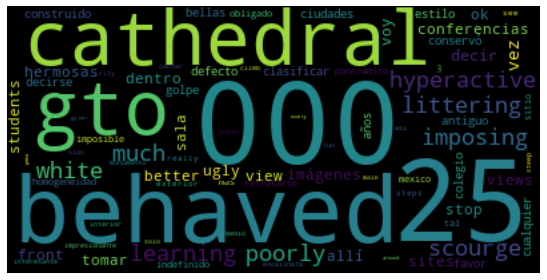

In [14]:
parameters = {"wordcloud name": ""}
for file in files:
    nameplace = obtain_name_place_from_filename(file)
    print(nameplace)
    tripadvisor.read_data(file)
    tripadvisor.obtain_only_negatives_scores()
    vocabulary = vocabulary_model.obtain(tripadvisor,
                                         data_select=True)
    word_index = dictionary.build_word_index(vocabulary)
    index_word = dictionary.build_index_word(word_index)
    bow_tfidf, words = bow.build_TFIDF(tripadvisor,
                                       word_index,
                                       data_select=True,
                                       return_words=True)
    best_features, scores = obtain_best_features(bow_tfidf,
                                                 tripadvisor.data_select["Escala"],
                                                 'all')
    results = {}
    for index in best_features:
        results[words[index]] = scores[index]
    results = dictionary.sort_dict(results)
    results = DataFrame(results,
                        columns=["Words", "Scores"])
    results.index = results["Words"]
    results = results.drop(columns="Words")
    data = results.dropna()
    plot_word_cloud(data["Scores"].to_dict(),
                    dataset,
                    parameters,
                    show=True)

### Problema 6

Alhóndiga


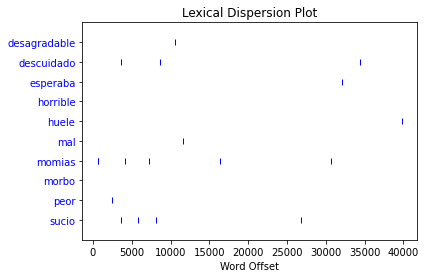

Basilica Colegiata


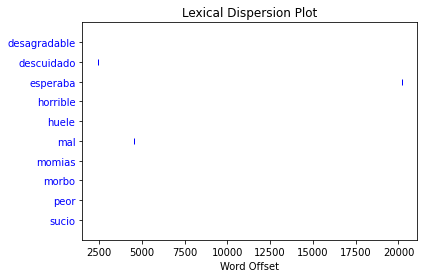

Callejón del Beso


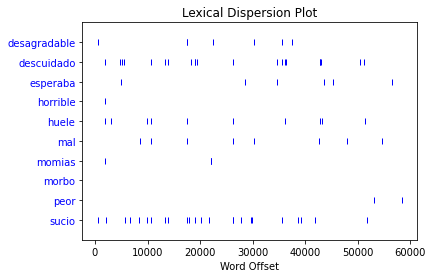

Casa de Diego Rivera


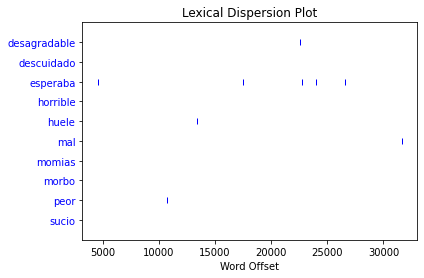

Jardín de la Unión


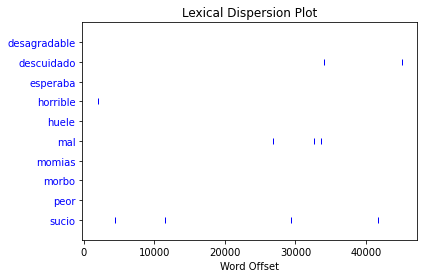

Mercado Hidalgo


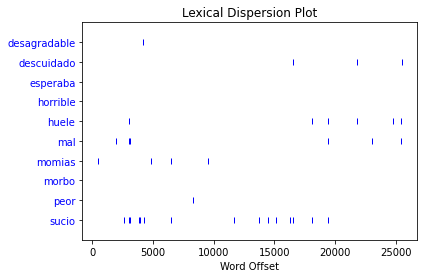

Monumento Pípila


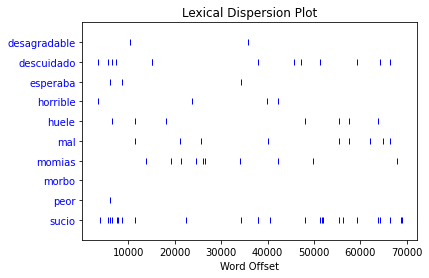

Museo de las Momias


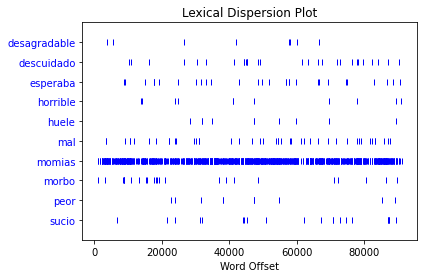

Teatro Juárez


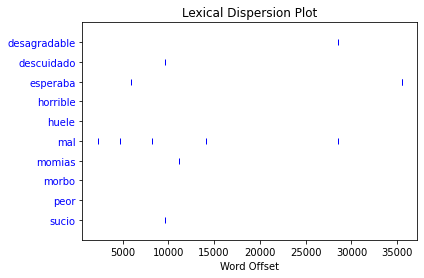

Universidad de Guanajuato


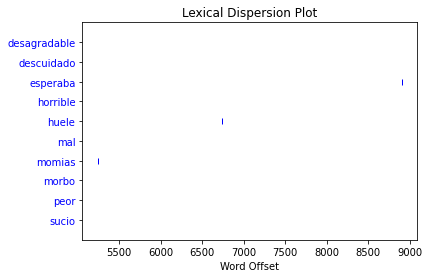

In [15]:
data = DataFrame()
# Concatenate all data
for file in files:
    tripadvisor.read_data(file)
    data = concat_dataframes(data, tripadvisor.data.copy())
tripadvisor.data = data.copy()
del data
tripadvisor.sort_by_date()
vocabulary = vocabulary_model.obtain(tripadvisor)
word_index = dictionary.build_word_index(vocabulary)
index_word = dictionary.build_index_word(word_index)
bow_tfidf, words = bow.build_TFIDF(tripadvisor,
                                   word_index,
                                   return_words=True)
best_features, scores = obtain_best_features(bow_tfidf,
                                             tripadvisor.data["new scale"],
                                             10)
words_list = []
for index in best_features:
    words_list += [words[index]]
for file in files:
    nameplace = obtain_name_place_from_filename(file)
    print(nameplace)
    tripadvisor.read_data(file)
    tripadvisor.sort_by_date()
    opinios = tripadvisor.obtain_opinions_as_text(vocabulary_model.stopwords)
    opinios.dispersion_plot(words_list.copy())

### Problema 7

Alhóndiga


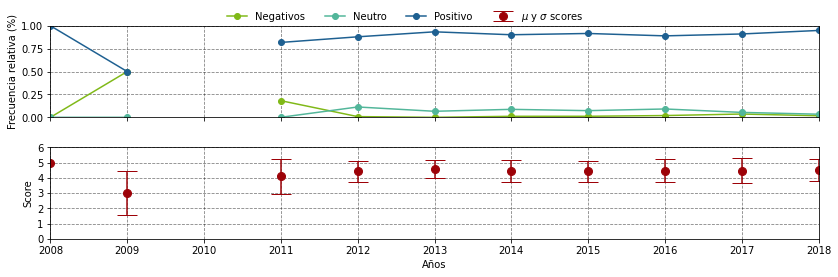

Basilica Colegiata


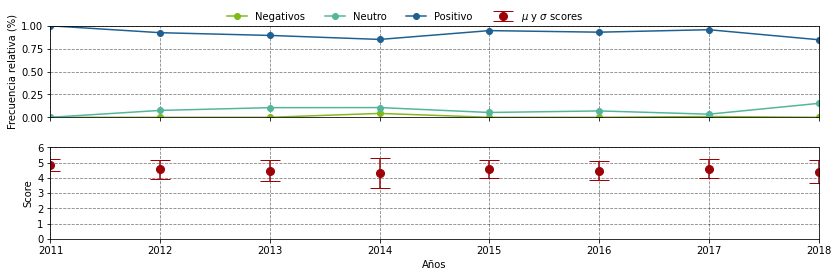

Callejón del Beso


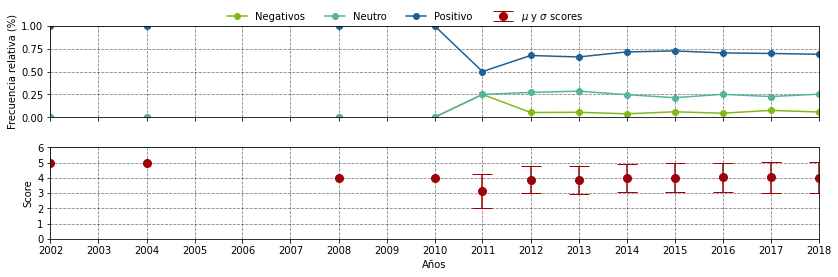

Casa de Diego Rivera


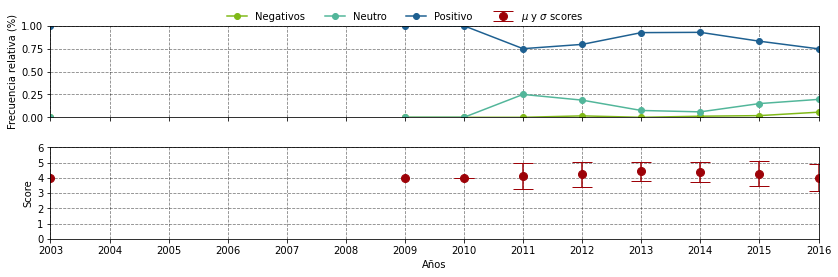

Jardín de la Unión


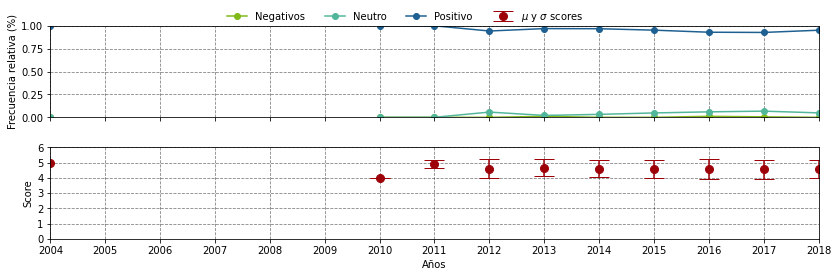

Mercado Hidalgo


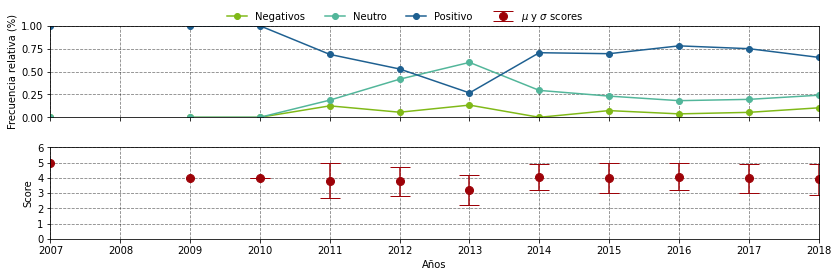

Monumento Pípila


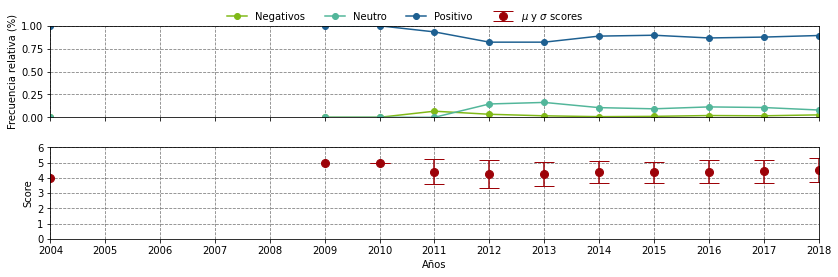

Museo de las Momias


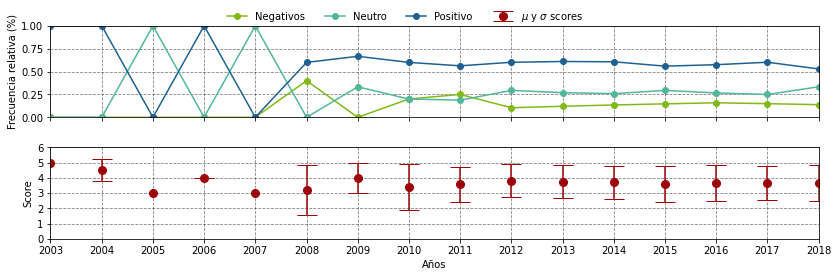

Teatro Juárez


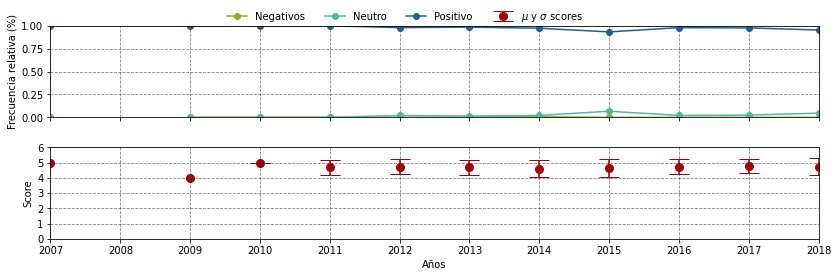

Universidad de Guanajuato


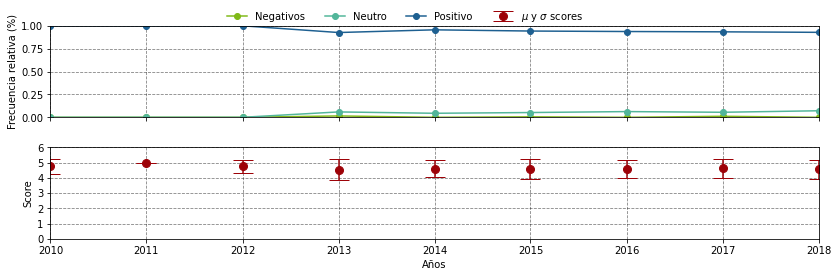

In [16]:
import warnings
warnings.filterwarnings("ignore")
parameters = {"file graphics": ""}
for file in files:
    nameplace = obtain_name_place_from_filename(file)
    print(nameplace)
    tripadvisor.read_data(file)
    tripadvisor.obtain_yearly_stadistics_of_scores()
    data = tripadvisor.yearly_data
    data.columns = [str(column) for column in data.columns]
    parameters["file graphics"] = file.replace(".csv", ".png")
    plot_yearly_results(data, dataset, parameters, show=True)

Alhóndiga


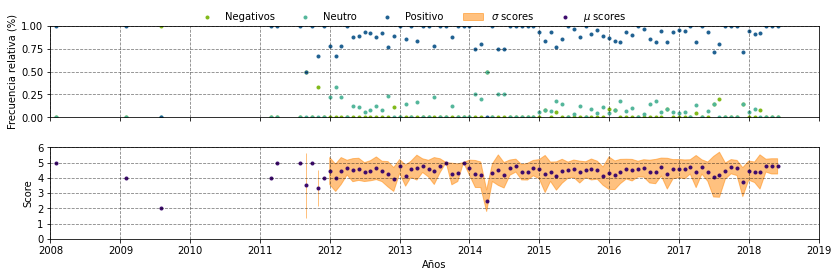

Basilica Colegiata


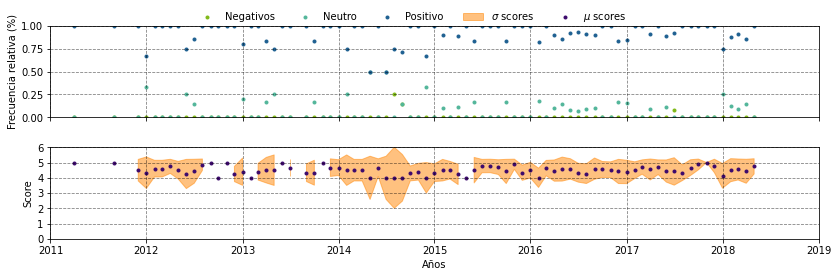

Callejón del Beso


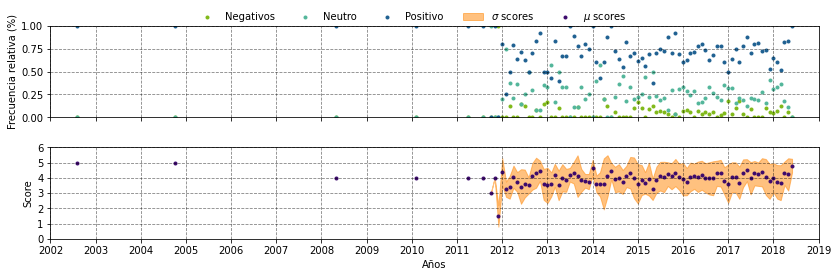

Casa de Diego Rivera


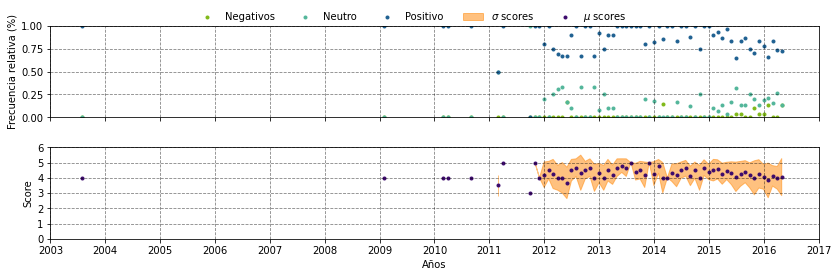

Jardín de la Unión


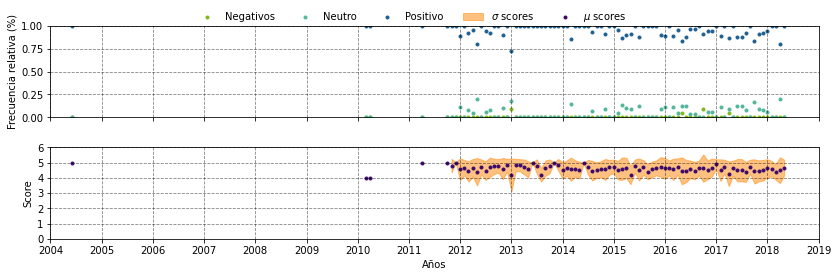

Mercado Hidalgo


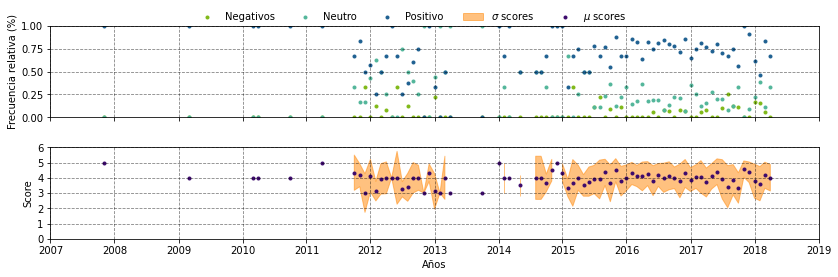

Monumento Pípila


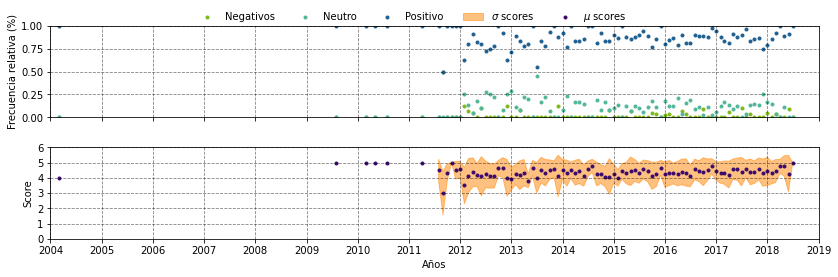

Museo de las Momias


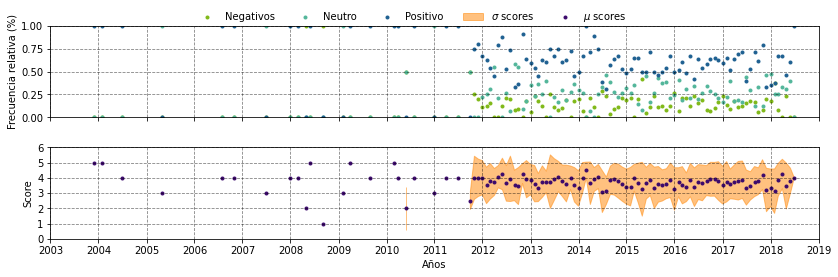

Teatro Juárez


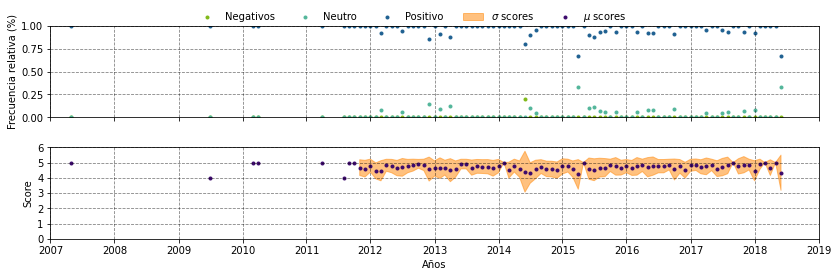

Universidad de Guanajuato


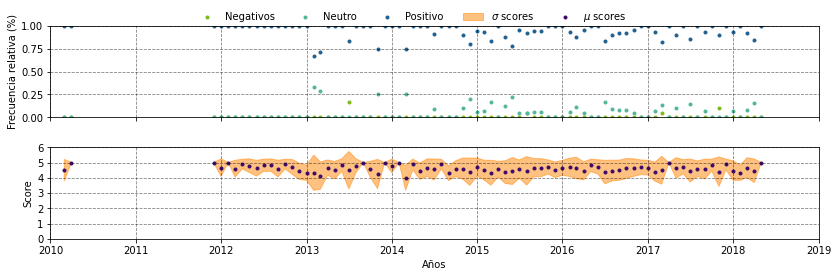

In [17]:
parameters = {"file graphics": ""}
for file in files:
    nameplace = obtain_name_place_from_filename(file)
    print(nameplace)
    filename = join_path(dataset.parameters["path results"],
                         file)
    tripadvisor.read_data(file)
    tripadvisor.obtain_monthly_stadistics_of_scores()
    data = tripadvisor.monthly_data
    data.columns = [str(column) for column in data.columns]
    parameters["file graphics"] = file.replace(".csv", ".png")
    plot_monthly_results(data, dataset, parameters, show=True)